# Multi Label Image Classification

## Understanding the Data

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tqdm.auto import tqdm
from PIL import Image
import os

import torch
from torch.utils.data import Dataset
import cv2

from torch.utils.data import DataLoader

from sklearn.model_selection import train_test_split

import torch.nn as nn
from torchvision import models
from torchvision.models import ResNet18_Weights 

In [2]:
path = '..\data\data.csv'
data = pd.read_csv(path)

In [3]:
data.head()

,Image_Name,"Classes(motorcycle, truck, boat, bus, cycle, , , , , , , sitar, ektara, flutes, tabla, harmonium)",motorcycle,truck,boat,bus,cycle,sitar,ektara,flutes,tabla,harmonium
0,image1.jpg,bus,0,0,0,1,0,0,0,0,0,0
1,image2.jpg,sitar,0,0,0,0,0,1,0,0,0,0
2,image3.jpg,flutes,0,0,0,0,0,0,0,1,0,0
3,image4.jpg,bus,0,0,0,1,0,0,0,0,0,0
4,image5.jpg,bus,0,0,0,1,0,0,0,0,0,0


In [6]:
column_names = data.columns.tolist()

In [7]:
column_names

['Image_Name',
 ' Classes(motorcycle, truck, boat, bus, cycle, , , , , , , sitar, ektara, flutes, tabla, harmonium)',
 'motorcycle',
 'truck',
 'boat',
 'bus',
 'cycle',
 'sitar',
 'ektara',
 'flutes',
 'tabla',
 'harmonium']

In [8]:
data.rename(columns={column_names[1]: 'Classes'},inplace=True)

In [9]:
data.head()

,Image_Name,Classes,motorcycle,truck,boat,bus,cycle,sitar,ektara,flutes,tabla,harmonium
0,image1.jpg,bus,0,0,0,1,0,0,0,0,0,0
1,image2.jpg,sitar,0,0,0,0,0,1,0,0,0,0
2,image3.jpg,flutes,0,0,0,0,0,0,0,1,0,0
3,image4.jpg,bus,0,0,0,1,0,0,0,0,0,0
4,image5.jpg,bus,0,0,0,1,0,0,0,0,0,0


In [10]:
data.shape

(7943, 12)

In [16]:
labels = []
for idx, row in data.iterrows():
    labels.append(list(row.iloc[-10:]))

print(labels)

[[0, 0, 0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 1, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 1, 1], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 

In [20]:
labels = np.array(labels)
print(labels.shape)

(7943, 10)


In [11]:
label_names = data.columns.tolist()

In [17]:
label_names = label_names[-10:]
print(label_names)

['motorcycle', 'truck', 'boat', 'bus', 'cycle', 'sitar', 'ektara', 'flutes', 'tabla', 'harmonium']


## Read Images

In [25]:
image_names = data['Image_Name'].tolist()
print(image_names[:5])

['image1.jpg', 'image2.jpg', 'image3.jpg', 'image4.jpg', 'image5.jpg']


In [ ]:
images = []
images_path = '..\data\images'

for image_name in tqdm(image_names):
    image_path = os.path.join(images_path, image_name) #actual image path
    image = Image.open(image_path) #reads image to pixels
    image = np.array(image) 
    images.append(image)


In [ ]:
images = np.array(images, dtype=object) #converting list to array


In [49]:
images.shape

(7943,)

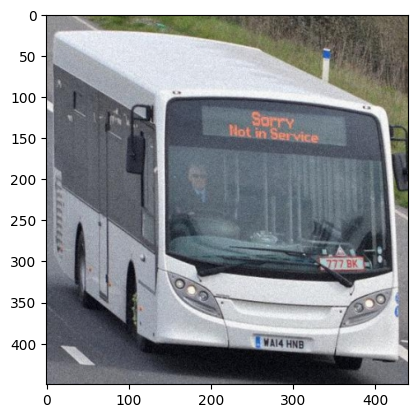

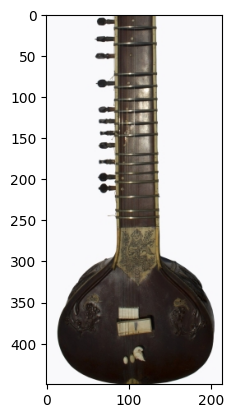

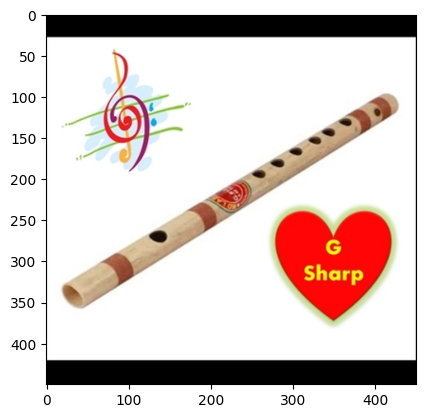

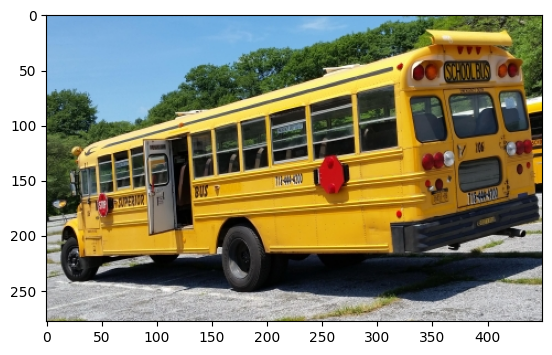

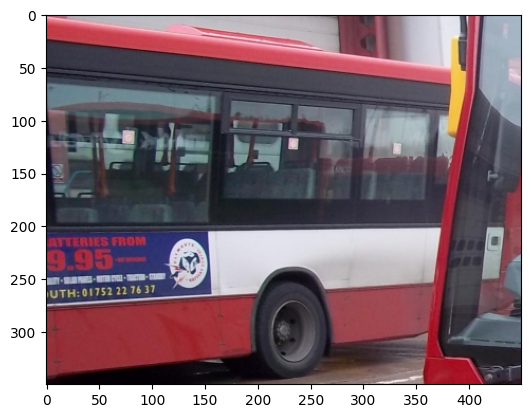

In [52]:
#visualizing the images
for idx,img in enumerate(images):
    plt.imshow(img)
    plt.show()
    if idx>3: 
        break

## Understanding Class Labels

In [58]:
#Labels per class
class_distr = np.sum(labels,axis=0)
print(class_distr)

[1339 1015 1671  661 1449  401  332  554 1480  615]


In [61]:
print(label_names)

['motorcycle', 'truck', 'boat', 'bus', 'cycle', 'sitar', 'ektara', 'flutes', 'tabla', 'harmonium']


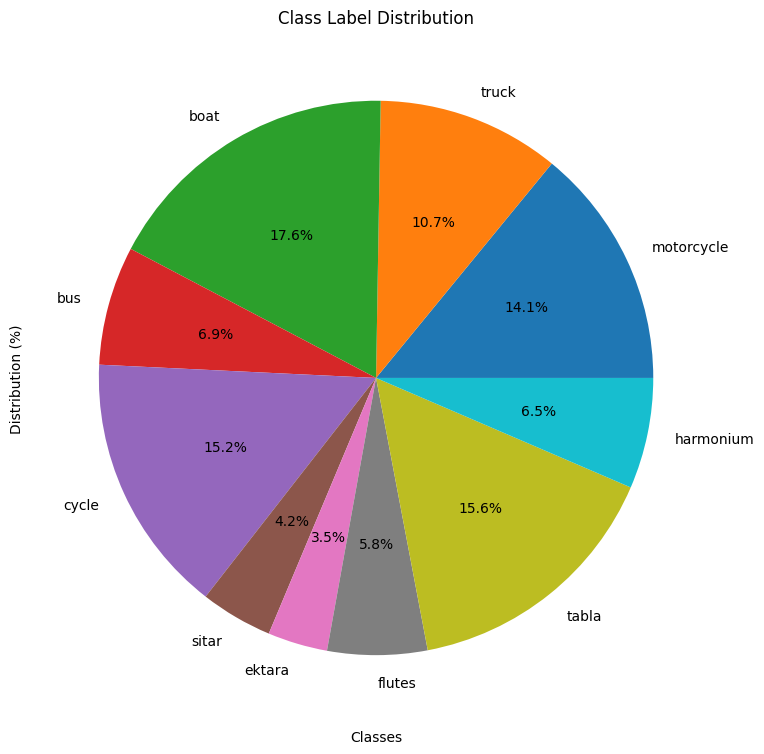

In [ ]:
plt.figure(figsize=(16,9))
plt.pie(class_distr, labels=label_names, autopct='%.1f%%')
plt.xlabel('Classes')
plt.ylabel('Distribution (%)')
plt.title("Class Label Distribution")
plt.show()

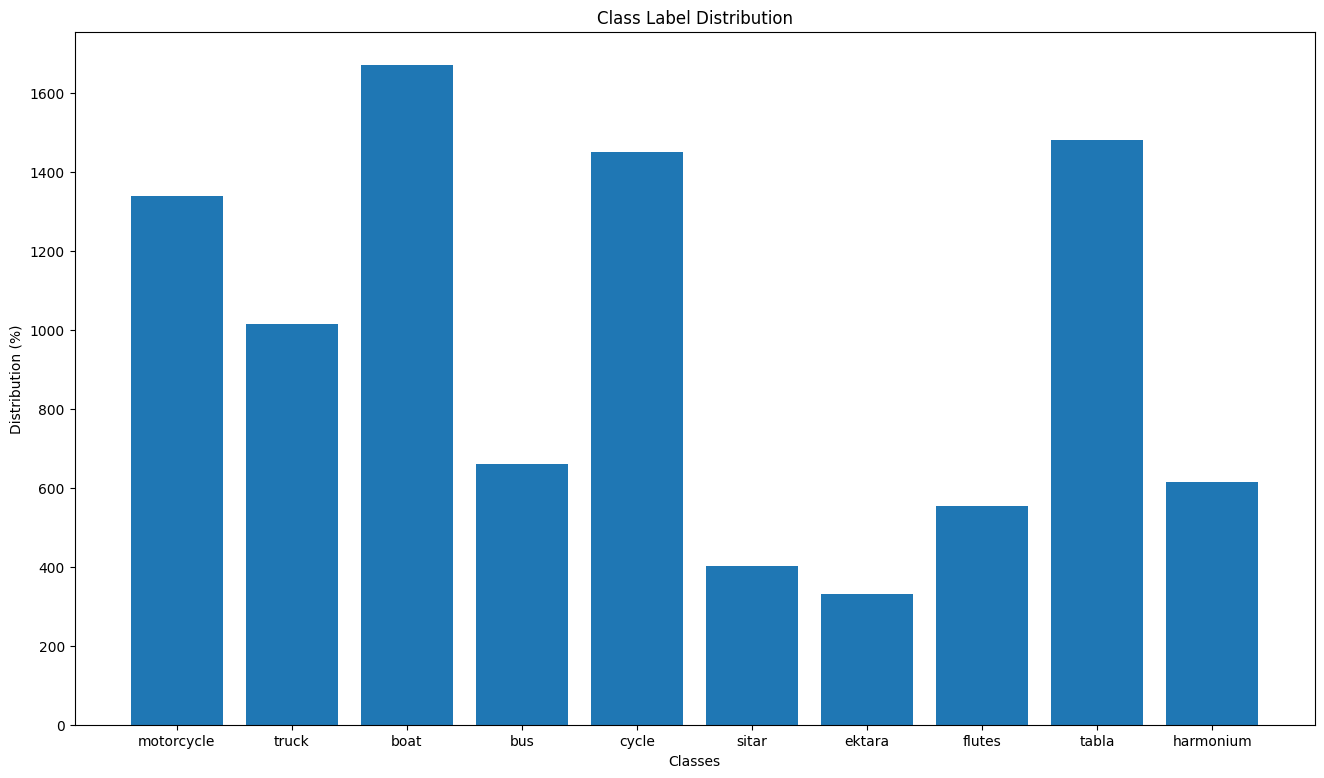

In [71]:
plt.figure(figsize=(16,9))
plt.bar(label_names,class_distr)
plt.xlabel('Classes')
plt.ylabel('Distribution (%)')
plt.title("Class Label Distribution")
plt.show()

## Customize the Pytorch Dataset Class

In [ ]:
# Pytorch Dataset (Implements) ->  __getitem__ , __len__, __add__(no need to implement)

In [23]:
class MLDataset(Dataset): #(Inheriting the Tesor Dataset)
    def __init__(self):
        super().__init__()

        data_path = '..\data\data.csv'
        images_path = '..\data\images'
        
        self.images, self.labels = [], []

        data = pd.read_csv(data_path)
        # column names
        column_names = data.columns.tolist()
        # rename
        data.rename(columns={column_names[1]:'Classes'},inplace=True)
        label_names = column_names[-10:]
        for index, row in data.iterrows():
            #extracting only the label values
            label = list(row[-10:])
            self.labels.append(label)
        self.labels = np.array(self.labels)

        image_names = data['Image_Name'].tolist()

        for image_name in tqdm(image_names):
            image_path = os.path.join(images_path, image_name)
            #Some of the images doesn't have 3 channels(grayscale)
            image = Image.open(image_path).convert('RGB')  # Ensuring all images are RGB
            image = np.array(image) #converting list to array

            #Making the image dimensionality consitent with 64*64*3    
            image = cv2.resize(image,(64,64))
            self.images.append(image)

        self.images = np.array(self.images)

        self.normalize()


    #Normalise the values 
    def normalize(self):
        self.images = self.images/255

    
    def __len__(self):
        return self.images.shape[0]
    
    def __getitem__(self, index):
        sample = {'images': self.images[index], 'labels':self.labels[index]}
        return sample


In [24]:
mlc = MLDataset()

  0%|          | 0/7943 [00:00<?, ?it/s]

In [25]:
#Testing __len__
mlc.images.shape, len(mlc)

((7943, 64, 64, 3), 7943)

In [26]:
#Testing __getitem__
print(mlc[12])

{'images': array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       ...,

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]], shape=(64, 64, 3)), 'labels': array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0])}


In [27]:
# Testing __add__
mlc_2 = MLDataset()

  0%|          | 0/7943 [00:00<?, ?it/s]

In [28]:
mlc_3 = mlc+mlc_2 # 2 objects are concatinated

len(mlc), len(mlc_2),len(mlc_3)

(7943, 7943, 15886)

## Dataloaders

1. To iterate over dataset object to retrieve samples
2. Cut into mini batches
3. Shuffle

In [31]:
ml_data = MLDataset()

  0%|          | 0/7943 [00:00<?, ?it/s]

In [ ]:
# batch_size->to cut the batches into mini batches
# drop_last-> drops the last batch that doesnt have batch size
# total = 7, batchsize =2, drop_last = true,  
# drop_last will not lose the data because we will handle it using epochs to handle while training 
dataloader = DataLoader(ml_data,shuffle=True,batch_size=128, drop_last=True)

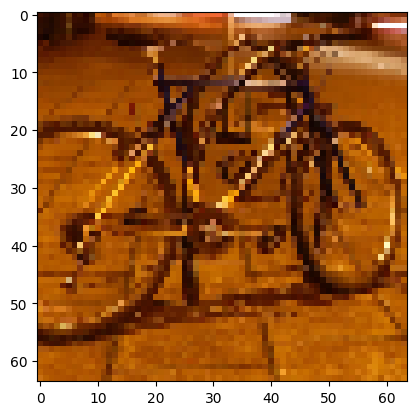

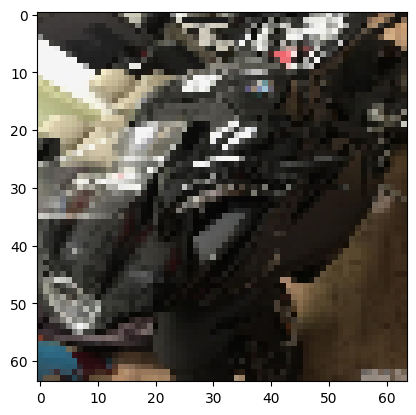

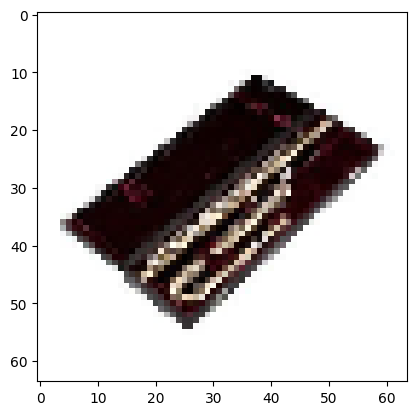

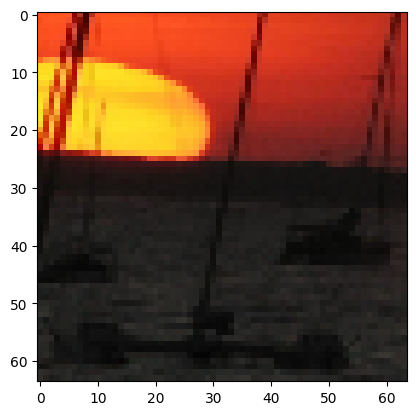

In [48]:
for idx, samp in enumerate(dataloader):
    #squeeze -> To get rid of extra dimension (Batch Size)
    image = samp['images'].squeeze()  
    label =  samp['labels'].tolist()[0] #Converting tensor to list
    plt.imshow(image)
    plt.show()

    if idx>2:
        break

## Train Test Validation sets

In [6]:
class MultiLabelDataset(Dataset): #(Inheriting the Tesor Dataset)
    def __init__(self, image_size):
        super().__init__()

        self.x_train, self.x_test, self.x_val, self.Y_train, self.Y_test, self.Y_val = None,None,None,None,None,None

        self.mode = 'train'

        data_path = '..\data\data.csv'
        images_path = '..\data\images'
        
        self.images, self.labels = [], []

        data = pd.read_csv(data_path)
        # column names
        column_names = data.columns.tolist()
        # rename
        data.rename(columns={column_names[1]:'Classes'},inplace=True)
        label_names = column_names[-10:]
        for index, row in data.iterrows():
            #extracting only the label values
            label = list(row[-10:])
            self.labels.append(label)
        self.labels = np.array(self.labels)

        image_names = data['Image_Name'].tolist()

        for image_name in tqdm(image_names):
            image_path = os.path.join(images_path, image_name)
            #Some of the images doesn't have 3 channels(grayscale)
            image = Image.open(image_path).convert('RGB')  # Ensuring all images are RGB
            image = np.array(image) #converting list to array

            #Making the image dimensionality consitent with x*x*3    
            image = cv2.resize(image,(image_size[0],image_size[1]))
            image = image.reshape((3,image_size[0],image_size[1])) #CNN expects it in this format
            self.images.append(image)

        self.images = np.array(self.images)

        self.normalize()
        self.data_split()


    #Normalise the values 
    def normalize(self):
        self.images = self.images/255

    
    #Test-> 33%, Train-> ~45%, Val-> ~22%
    def data_split(self):
        self.x_train,self.x_test, self.Y_train, self.Y_test = train_test_split(self.images, self.labels, test_size=0.33, random_state=42)
        self.x_train,self.x_val, self.Y_train, self.Y_val = train_test_split(self.x_train,self.Y_train, test_size=0.33, random_state=42)
    
    def __len__(self):
        if self.mode == 'train':
            return self.x_train.shape[0]
        elif self.mode == 'test':
            return self.x_test.shape[0]
        elif self.mode == 'val':
            return self.x_val.shape[0]
    
    def __getitem__(self, index):
        if self.mode == 'train':
            sample = {'images': self.x_train[index], 'labels':self.labels[index]}
            return sample
        elif self.mode == 'test':
            sample = {'images': self.x_test[index], 'labels':self.labels[index]}
            return sample
        elif self.mode == 'val':
            sample = {'images': self.x_val[index], 'labels':self.labels[index]}
            return sample

In [ ]:
mlds = MultiLabelDataset((64,64))

  0%|          | 0/7943 [00:00<?, ?it/s]

In [5]:
print(mlds.mode)
len(mlds)

train


3565

In [79]:
mlds.mode = 'test'
len(mlds)

2622

In [80]:
mlds.mode = 'val'
len(mlds)

1756

## Creating Convolutional Neural Network using Pre Trained - ResNet18

https://github.com/pytorch/vision/blob/main/torchvision/models/resnet.py

### Looking at ResNet18 

In [4]:
model = models.resnet18(weights=ResNet18_Weights)

e:\Git Repos\MultiLabel-Image-Tagging-with-Residual-Neural-Network-ResNet-18-CNN\.venv\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [85]:
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [86]:
model.fc

Linear(in_features=512, out_features=1000, bias=True)

To adapt ResNet for our task, we need to modify the final `fc` layer - changing input and output


### Building our Model

In [23]:
class MultiLabelClassifier(nn.Module):
    def __init__(self, num_classes):
        super(MultiLabelClassifier, self).__init__() #To keep everything from actual
        self.resnet = models.resnet18(weights=ResNet18_Weights.DEFAULT)
        self.in_features = self.resnet.fc.in_features
        self.resnet.fc = nn.Linear(self.in_features,num_classes)
    
    def forward(self,x):
        x = self.resnet(x)
        return x


In [96]:
model = MultiLabelClassifier(num_classes=10)

In [97]:
model

MultiLabelClassifier(
  (resnet): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=Tru

requires_grad in PyTorch determines if a tensor's gradients are computed for backpropagation; True enables updates, while False freezes values to save memory and speed up computations.

In [100]:
for name, param in model.resnet.named_parameters():
    print(name, param.requires_grad)

conv1.weight True
bn1.weight True
bn1.bias True
layer1.0.conv1.weight True
layer1.0.bn1.weight True
layer1.0.bn1.bias True
layer1.0.conv2.weight True
layer1.0.bn2.weight True
layer1.0.bn2.bias True
layer1.1.conv1.weight True
layer1.1.bn1.weight True
layer1.1.bn1.bias True
layer1.1.conv2.weight True
layer1.1.bn2.weight True
layer1.1.bn2.bias True
layer2.0.conv1.weight True
layer2.0.bn1.weight True
layer2.0.bn1.bias True
layer2.0.conv2.weight True
layer2.0.bn2.weight True
layer2.0.bn2.bias True
layer2.0.downsample.0.weight True
layer2.0.downsample.1.weight True
layer2.0.downsample.1.bias True
layer2.1.conv1.weight True
layer2.1.bn1.weight True
layer2.1.bn1.bias True
layer2.1.conv2.weight True
layer2.1.bn2.weight True
layer2.1.bn2.bias True
layer3.0.conv1.weight True
layer3.0.bn1.weight True
layer3.0.bn1.bias True
layer3.0.conv2.weight True
layer3.0.bn2.weight True
layer3.0.bn2.bias True
layer3.0.downsample.0.weight True
layer3.0.downsample.1.weight True
layer3.0.downsample.1.bias True
la

In [102]:
for name, param in model.resnet.named_parameters():
    print(name, param.data)
    break

conv1.weight tensor([[[[-1.0419e-02, -6.1356e-03, -1.8098e-03,  ...,  5.6615e-02,
            1.7083e-02, -1.2694e-02],
          [ 1.1083e-02,  9.5276e-03, -1.0993e-01,  ..., -2.7124e-01,
           -1.2907e-01,  3.7424e-03],
          [-6.9434e-03,  5.9089e-02,  2.9548e-01,  ...,  5.1972e-01,
            2.5632e-01,  6.3573e-02],
          ...,
          [-2.7535e-02,  1.6045e-02,  7.2595e-02,  ..., -3.3285e-01,
           -4.2058e-01, -2.5781e-01],
          [ 3.0613e-02,  4.0960e-02,  6.2850e-02,  ...,  4.1384e-01,
            3.9359e-01,  1.6606e-01],
          [-1.3736e-02, -3.6746e-03, -2.4084e-02,  ..., -1.5070e-01,
           -8.2230e-02, -5.7828e-03]],

         [[-1.1397e-02, -2.6619e-02, -3.4641e-02,  ...,  3.2521e-02,
            6.6221e-04, -2.5743e-02],
          [ 4.5687e-02,  3.3603e-02, -1.0453e-01,  ..., -3.1253e-01,
           -1.6051e-01, -1.2826e-03],
          [-8.3730e-04,  9.8420e-02,  4.0210e-01,  ...,  7.0789e-01,
            3.6887e-01,  1.2455e-01],
       

In [103]:
model.resnet.fc.weight

Parameter containing:
tensor([[-0.0151, -0.0153,  0.0284,  ...,  0.0333, -0.0197, -0.0032],
        [-0.0297, -0.0077,  0.0275,  ..., -0.0219, -0.0127, -0.0074],
        [-0.0328, -0.0171,  0.0424,  ..., -0.0300,  0.0076,  0.0141],
        ...,
        [ 0.0017,  0.0295,  0.0331,  ..., -0.0342, -0.0297,  0.0396],
        [-0.0224, -0.0087, -0.0284,  ...,  0.0302,  0.0349, -0.0310],
        [ 0.0213, -0.0364, -0.0366,  ..., -0.0206,  0.0294,  0.0440]],
       requires_grad=True)

In [104]:
model.resnet.fc.bias

Parameter containing:
tensor([-0.0030, -0.0223,  0.0246,  0.0022,  0.0230,  0.0411, -0.0214,  0.0211,
        -0.0246, -0.0039], requires_grad=True)

## Training our Model

In [ ]:
img_size = (256,256)

#instantiating new Dataset object
dataset = MultiLabelDataset(img_size)

  0%|          | 0/7943 [00:00<?, ?it/s]

In [11]:
len(dataset)

3565

In [15]:
#Loading GPU
device = torch.device('cuda:0')

In [30]:
data_loader = DataLoader(dataset, batch_size=32,shuffle=True, drop_last=True)

num_classes = dataset.Y_train.shape[1]

resnet_model = MultiLabelClassifier(num_classes=num_classes)

In [31]:

resnet_model = resnet_model.to(device)

 HyperParameters

In [32]:
# Initial step size/ learning rate => small
eta = 0.0005
epochs = 10
# Using Adam Optimizer to adaptive step size(learning rate)  
optimizer = torch.optim.Adam(resnet_model.parameters(), lr=eta)

In [33]:
#Tracking Loss end of every epoch
train_epoch_loss = []
dataset.mode = 'train'

Training - Epochs

In [35]:
for epoch in tqdm(range(epochs)):
    train_losses = []
    resnet_model.train()
    for D in data_loader:
        #Setting Gradient to zero before moving to next datapoint comes in
        optimizer.zero_grad()
        
        #Data should be in correct torch format before passing to resnet layers(weights->torch.cuda.float-tensors)
        data = D['images'].to(device,dtype = torch.float) #torch.cuda.double.tensor -> torch.cuda.float.tensor 
        labels = D['labels'].to(device,dtype = torch.float) #torch.cuda.double.tensor -> torch.cuda.float.tensor 
        y_hat = resnet_model(data)
        
        #Note: Apply sigmoid for evry output - Multi Label
        error = nn.BCEWithLogitsLoss() # Applies Sigmoid before computing ground truth
        loss = torch.sum(error(y_hat,labels))
        loss.backward()

        #Encoperate gradients into current values of parameters and update all of them
        optimizer.step()
        
        #keep record of loss before moving to next data point
        train_losses.append(loss.item())
    train_epoch_loss.append(np.mean(train_losses))
    print("Train Epoch: {}\\tTrain Loss: {:6f}".format(epoch+1,np.mean(train_losses)))


  0%|          | 0/10 [00:00<?, ?it/s]

Train Epoch: 1\tTrain Loss: 0.310846
Train Epoch: 2\tTrain Loss: 0.289282
Train Epoch: 3\tTrain Loss: 0.288742
Train Epoch: 4\tTrain Loss: 0.288745
Train Epoch: 5\tTrain Loss: 0.288862
Train Epoch: 6\tTrain Loss: 0.287803
Train Epoch: 7\tTrain Loss: 0.287295
Train Epoch: 8\tTrain Loss: 0.287779
Train Epoch: 9\tTrain Loss: 0.286781
Train Epoch: 10\tTrain Loss: 0.286427
